In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 30kB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv1D,MaxPool1D,Dropout,BatchNormalization
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0


In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Folder/Data Folder/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Balancing the dataset

In [9]:
non_fraud = data[data["Class"]==0]
fraud = data[data["Class"]==1]
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [10]:
# The non-fraud and fraud datasets are imbalanaced,
# so first we have to sample from non_fraud and append to fraud dataset and create a new dataset 
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = fraud.append(non_fraud,ignore_index=True)
data

(492, 31)

In [14]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
X = data.drop("Class",axis = 1)
y = data["Class"]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state =0 , stratify = y )
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [17]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,118578.0,2.223486,-1.500806,-0.644077,-1.797258,-1.130154,0.272245,-1.483661,0.105621,-1.294010,1.649984,0.471729,0.126625,1.068873,-0.542714,-0.570181,0.026113,-0.034521,0.354259,0.250912,-0.318245,-0.366698,-0.651640,0.420002,0.164178,-0.563207,-0.507434,0.032472,-0.039083,29.95
898,56716.0,-2.160131,0.850672,0.842749,-0.881879,-0.855656,-0.283590,0.128139,0.512129,1.083107,0.119109,-1.456898,0.078095,0.074729,-0.550606,-0.383657,0.387643,-0.380059,-0.082296,-0.279251,0.302862,-0.092879,0.349206,-0.395731,-0.039340,0.021547,0.979663,0.104867,-0.262733,78.08
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,-13.670545,10.545263,-15.022700,0.171633,-15.066374,-0.259576,-8.668739,-12.804141,-5.116620,0.579200,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,59726.0,1.242480,0.411213,-0.499982,0.875620,0.679722,-0.221538,0.552496,-0.222338,-0.362062,-0.035522,-0.738135,0.497751,1.013257,0.371928,0.900493,-0.303716,-0.388192,-0.649864,-0.310185,-0.050047,0.001713,0.086415,-0.253807,-0.732668,0.911632,-0.219903,0.008368,0.005400,27.90
739,155453.0,-0.395048,1.134577,-1.146379,-0.264963,0.741362,-0.884296,0.550906,0.176754,-0.397437,-0.833501,0.717049,0.631393,0.447125,-0.593683,-0.030775,0.502155,0.214490,1.366433,0.281719,-0.239764,0.382796,1.061616,-0.043301,-0.559328,-0.274064,-0.164294,-0.272301,0.054291,11.80


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [20]:
X_train

array([[ 0.65406771,  0.81721788, -0.88773025, ..., -0.04881597,
        -0.17844698, -0.2963996 ],
       [-0.64488899,  0.0487114 , -0.26862209, ...,  0.01935209,
        -0.70079107, -0.09623636],
       [-1.44945599, -2.11015055,  1.21959779, ...,  2.46916307,
        -2.40616739, -0.41679698],
       ...,
       [-1.58182518, -0.40141985,  0.30897108, ..., -1.33341998,
         1.56102186, -0.29456973],
       [ 1.34617129,  0.7760197 , -0.51838276, ..., -0.09578438,
        -0.1205929 , -0.20045599],
       [ 1.67152989,  0.82922511, -0.89245923, ..., -0.06479041,
        -0.20409361, -0.38103127]])

In [21]:
X_test

array([[ 1.63973518,  0.38108064, -0.23813074, ..., -0.06170116,
         0.14040415, -0.46306956],
       [-0.41189935,  0.35874192, -0.13906954, ...,  0.85283334,
         0.74511649,  0.3569099 ],
       [-1.00124071, -0.80091682,  0.91875173, ...,  2.04561702,
         0.5909042 , -0.45680178],
       ...,
       [ 1.13455341,  0.83935531, -0.66519701, ..., -0.11560507,
        -0.14668055, -0.03675062],
       [ 0.99577572, -0.38777352, -0.87277613, ...,  0.97998924,
         1.1069877 , -0.44580568],
       [ 1.30487055,  0.11380901, -1.56367511, ...,  0.13586844,
         0.77670435,  5.03989396]])

In [22]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train.shape,y_test.shape

((787,), (197,))

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30, 1), (197, 30, 1), (787,), (197,))

# Build the CNN

In [27]:
epochs = 20

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr=0.00001), loss = "binary_crossentropy" , metrics=["accuracy"])

In [30]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose = 1)

Epoch 1/20
25/25 [==============================] - 0s 17ms/step - loss: 0.9060 - accuracy: 0.6086 - val_loss: 0.6510 - val_accuracy: 0.6954
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.8779 - accuracy: 0.6010 - val_loss: 0.6281 - val_accuracy: 0.7766
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 0.8003 - accuracy: 0.6302 - val_loss: 0.6045 - val_accuracy: 0.7411
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6824 - accuracy: 0.6722 - val_loss: 0.5824 - val_accuracy: 0.7259
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.7179 - val_loss: 0.5606 - val_accuracy: 0.7157
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6340 - accuracy: 0.6950 - val_loss: 0.5380 - val_accuracy: 0.7157
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6261 - accuracy: 0.7179 - val_loss: 0.5148 - val_accuracy: 0.7208
Epoch 8/20
25/25 [=

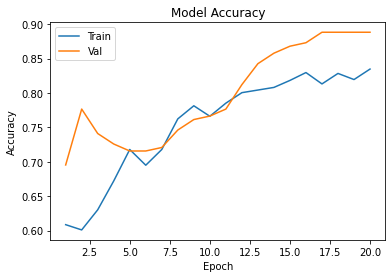

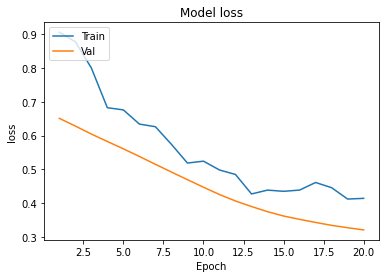

In [31]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()

plot_learningCurve(history,epochs=epochs) # model is niether underfitting nor overfitting

# After adding a Max-Pool Layer

In [34]:
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))  # Added a max-pool layer here
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))  # Added a max-pool layer here
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(optimizer=Adam(lr=0.00001), loss = "binary_crossentropy" , metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose = 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)            

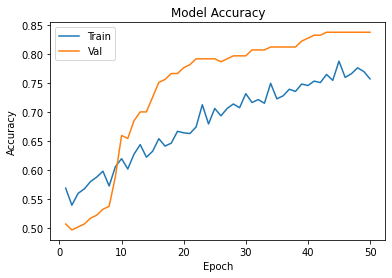

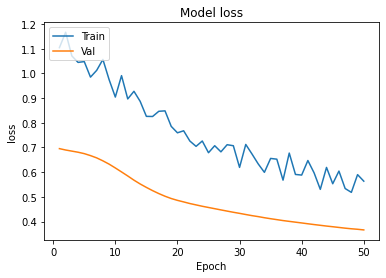

In [35]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()

plot_learningCurve(history,epochs=epochs)  
# Accuracy is not much improved by pooling layer unless epochs are increased greatly